# Exploratory Data Analysis for AlphaCare Insurance Solutions (ACIS)

This notebook contains the exploratory data analysis for the car insurance data from AlphaCare Insurance Solutions (ACIS). The analysis aims to help optimize the marketing strategy and discover "low-risk" targets for which the premium could be reduced.

In [28]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Define the path to the src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.insert(0, src_dir)

if 'data_loader' in sys.modules:
    del sys.modules['data_loader']
if 'eda' in sys.modules:
    del sys.modules['eda']
if 'statistical_analysis' in sys.modules:
    del sys.modules['statistical_analysis']

if 'advanced_visualizations' in sys.modules:
    del sys.modules['advanced_visualizations']

from data_loader import DataLoader
from eda import EDA
from statistical_analysis import StatisticalAnalysis
from advanced_visualizations import AdvancedVisualizations

## 1. Data Loading and Initial Exploration

In [17]:
data_loader = DataLoader('../resources/Data/machineLearning.txt')
data = data_loader.load_data()
print(data.head())
print(data.info())

e:\Studies\tenx\w3\src\data_loader.py:17: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path, sep='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

## 2. Data Quality Assessment

In [7]:
missing_values = data_loader.check_missing_values()
print("Missing values:")
print(missing_values)

# Check data types
print("\nData types:")
print(data.dtypes)

Missing values:
{'UnderwrittenCoverID': 0, 'PolicyID': 0, 'TransactionMonth': 0, 'IsVATRegistered': 0, 'Citizenship': 0, 'LegalType': 0, 'Title': 0, 'Language': 0, 'Bank': 145961, 'AccountType': 40232, 'MaritalStatus': 8259, 'Gender': 9536, 'Country': 0, 'Province': 0, 'PostalCode': 0, 'MainCrestaZone': 0, 'SubCrestaZone': 0, 'ItemType': 0, 'mmcode': 552, 'VehicleType': 552, 'RegistrationYear': 0, 'make': 552, 'Model': 552, 'Cylinders': 552, 'cubiccapacity': 552, 'kilowatts': 552, 'bodytype': 552, 'NumberOfDoors': 552, 'VehicleIntroDate': 552, 'CustomValueEstimate': 779642, 'AlarmImmobiliser': 0, 'TrackingDevice': 0, 'CapitalOutstanding': 2, 'NewVehicle': 153295, 'WrittenOff': 641901, 'Rebuilt': 641901, 'Converted': 641901, 'CrossBorder': 999400, 'NumberOfVehiclesInFleet': 1000098, 'SumInsured': 0, 'TermFrequency': 0, 'CalculatedPremiumPerTerm': 0, 'ExcessSelected': 0, 'CoverCategory': 0, 'CoverType': 0, 'CoverGroup': 0, 'Section': 0, 'Product': 0, 'StatutoryClass': 0, 'StatutoryRiskTy

## 3. Univariate Analysis

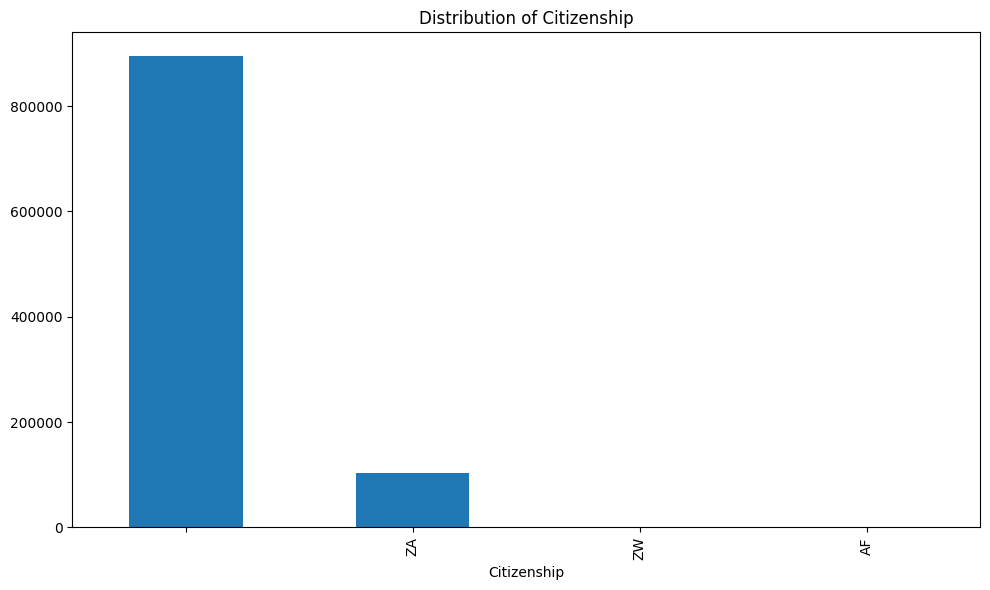

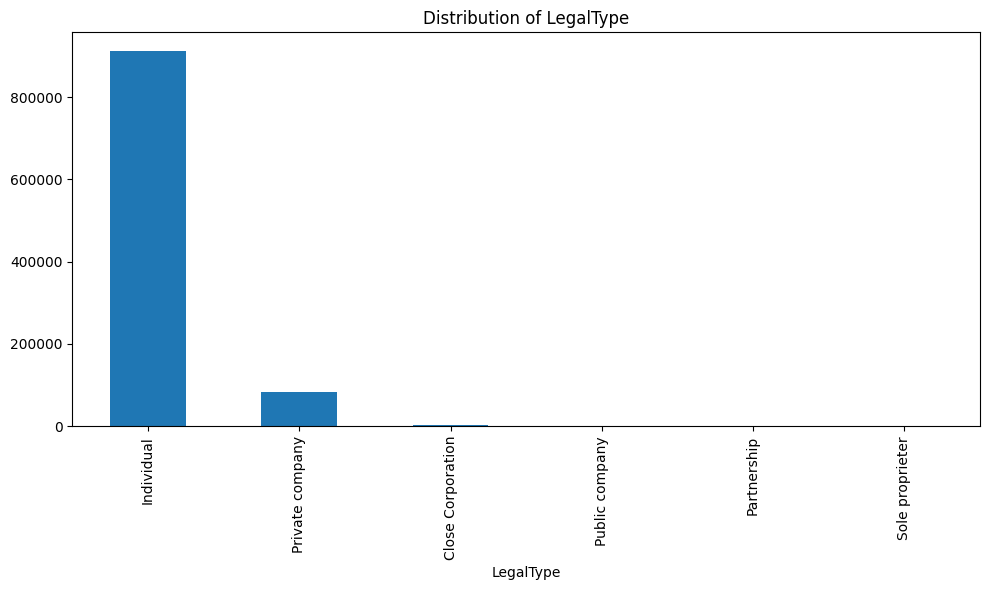

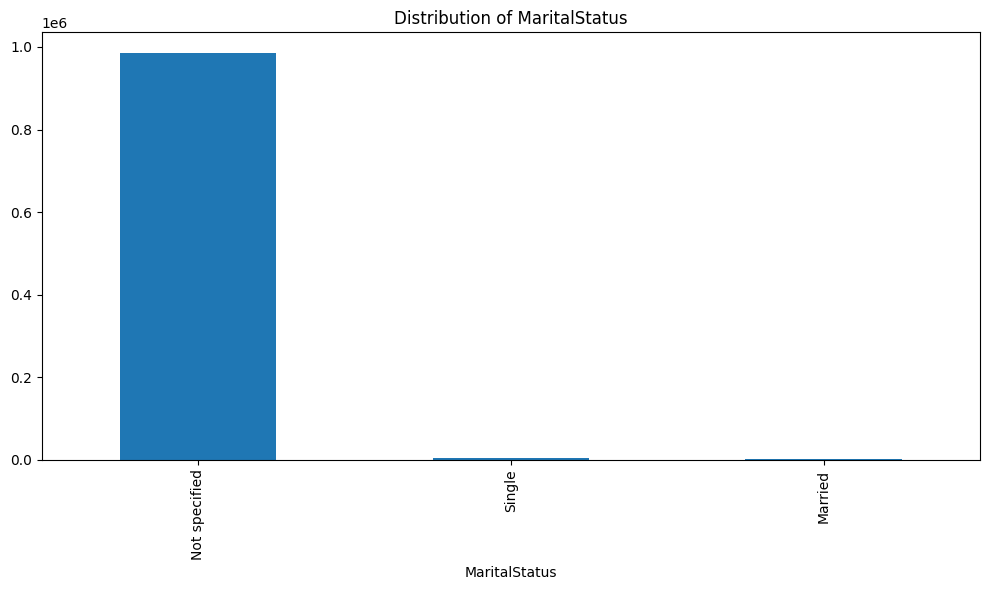

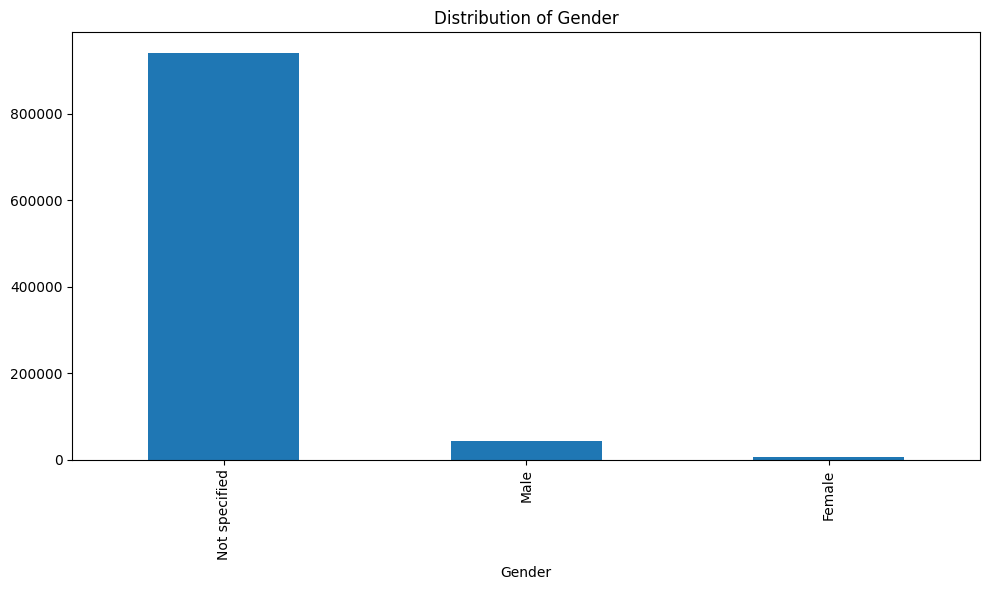

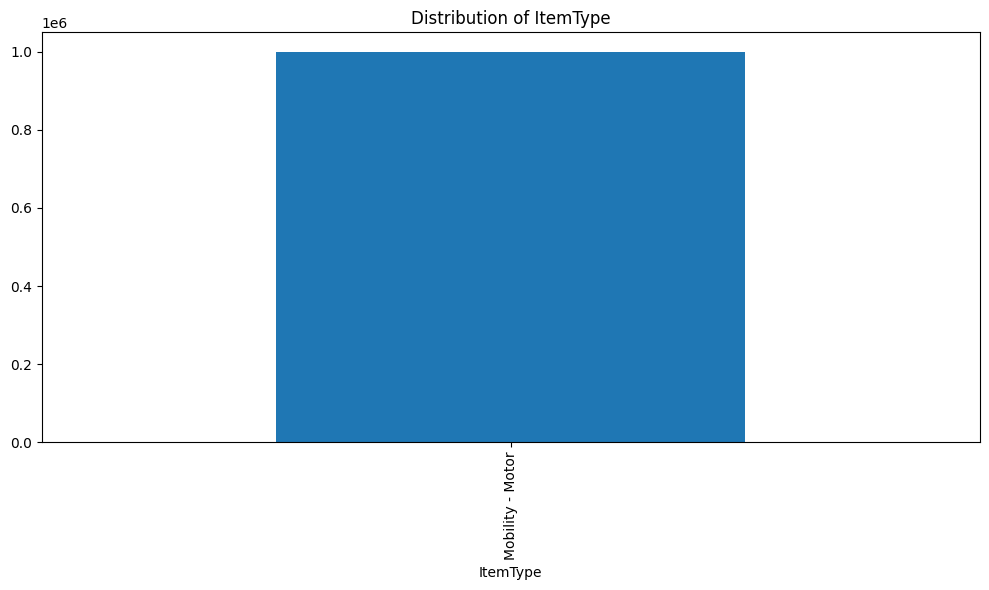

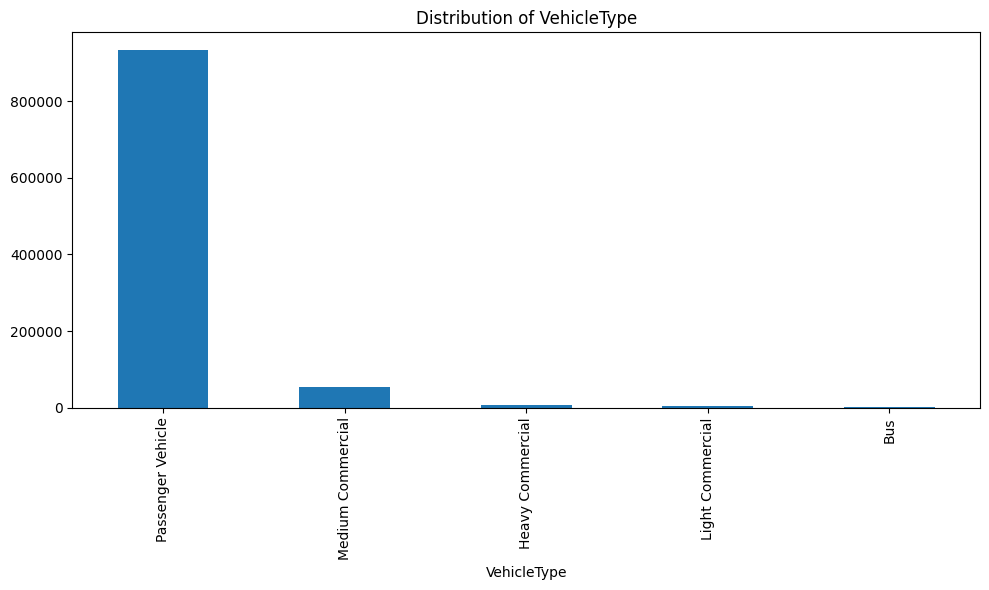

In [9]:
eda = EDA(data)

# Numerical columns
numerical_cols = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
eda.plot_histograms(numerical_cols, '../scripts/output')

# Categorical columns
categorical_cols = ['Citizenship', 'LegalType', 'MaritalStatus', 'Gender', 'ItemType', 'VehicleType']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## 4. Bivariate and Multivariate Analysis

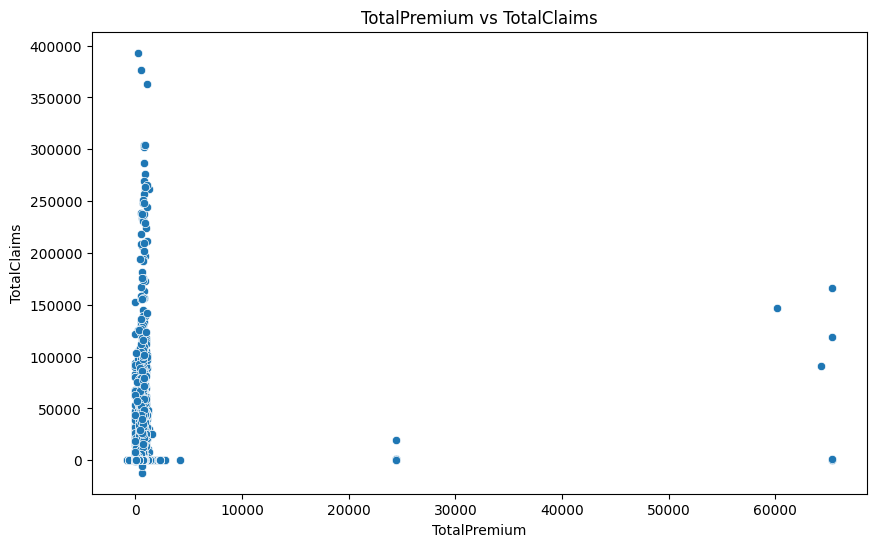

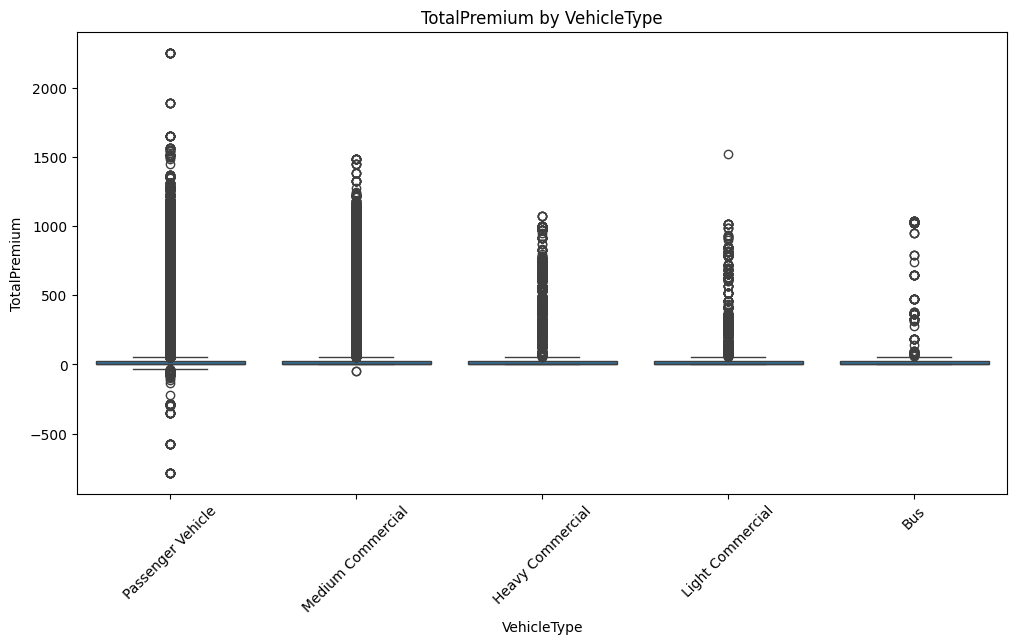

In [10]:
# Correlation matrix
eda.plot_correlation_matrix('../scripts/output')

# Scatter plot of TotalPremium vs TotalClaims
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data)
plt.title('TotalPremium vs TotalClaims')
plt.show()

# Box plot of TotalPremium by VehicleType
plt.figure(figsize=(12, 6))
sns.boxplot(x='VehicleType', y='TotalPremium', data=data)
plt.title('TotalPremium by VehicleType')
plt.xticks(rotation=45)
plt.show()

## 5. Outlier Detection

In [11]:
eda.plot_boxplots(numerical_cols, '../scripts/output')

## 6. Trends Over Geography

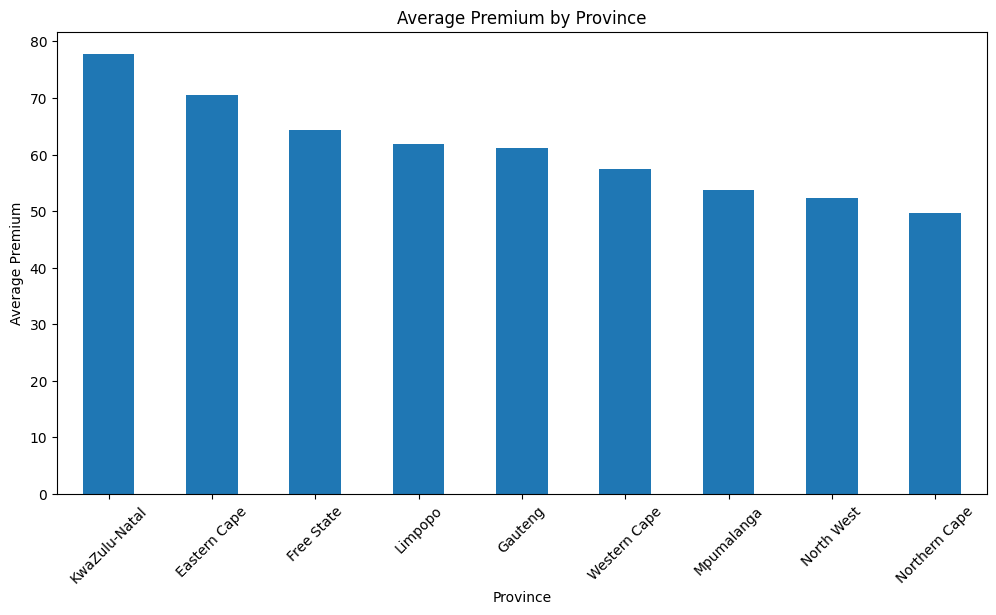

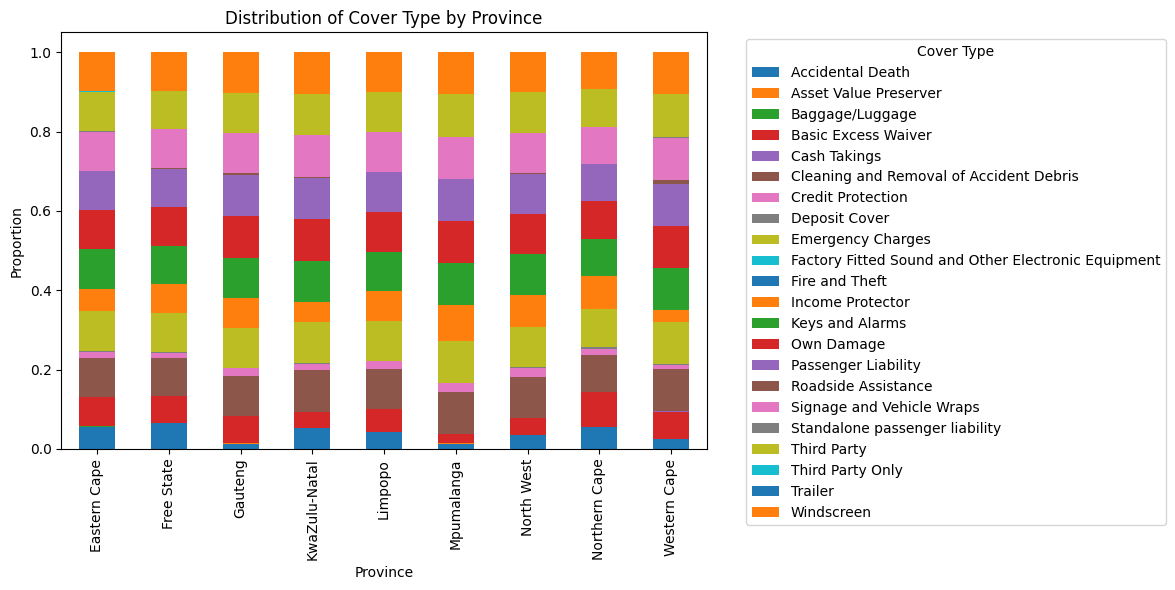

In [12]:
# Average premium by Province
avg_premium_by_province = data.groupby('Province')['TotalPremium'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_premium_by_province.plot(kind='bar')
plt.title('Average Premium by Province')
plt.ylabel('Average Premium')
plt.xticks(rotation=45)
plt.show()

# Distribution of CoverType by Province
cover_type_by_province = pd.crosstab(data['Province'], data['CoverType'], normalize='index')
cover_type_by_province.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Cover Type by Province')
plt.ylabel('Proportion')
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 7. Statistical Analysis

In [15]:
stats_analysis = StatisticalAnalysis(data)

# Confidence interval for TotalPremium
ci_premium = stats_analysis.calculate_confidence_interval('TotalPremium')
print(f"95% Confidence Interval for TotalPremium: {ci_premium}")

# T-test between TotalPremium for different genders
male_premiums = data[data['Gender'] == 'Male']['TotalPremium']
female_premiums = data[data['Gender'] == 'Female']['TotalPremium']
t_stat, p_value = stats.ttest_ind(male_premiums, female_premiums)
print(f"T-test results for TotalPremium between genders: t-statistic = {t_stat}, p-value = {p_value}")

# Correlation between TotalPremium and SumInsured
correlation = stats_analysis.calculate_correlation('TotalPremium', 'SumInsured')
print(f"Correlation between TotalPremium and SumInsured: {correlation}")

95% Confidence Interval for TotalPremium: (np.float64(61.454168174900644), np.float64(62.35682374075614))
T-test results for TotalPremium between genders: t-statistic = -5.118420932688848, p-value = 3.0925282750010697e-07
Correlation between TotalPremium and SumInsured: -0.04117421033787594


## 8. Advanced Visualizations

In [30]:
adv_vis = AdvancedVisualizations(data)

# Correlation heatmap
adv_vis.plot_correlation_heatmap('../scripts/output/correlation_heatmap.png')

# Premium by VehicleType and CoverType
adv_vis.plot_premium_by_vehicle_and_cover('../scripts/output/premium_by_vehicle_and_cover.png')

# Claims by Province
adv_vis.plot_claims_by_province('../scripts/output/claims_by_province.png', '../resources/Data/sa_shapefile/sa_shapefile.shp')

Index(['GID_4', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'GID_2', 'NAME_2',
       'GID_3', 'NAME_3', 'NAME_4', 'VARNAME_4', 'TYPE_4', 'ENGTYPE_4', 'CC_4',
       'geometry'],
      dtype='object')


## 9. Key Insights and Recommendations

Based on the exploratory data analysis, here are some key insights and recommendations:

1. [Insert key insight 1]
2. [Insert key insight 2]
3. [Insert key insight 3]

Recommendations for optimizing marketing strategy:
1. [Insert recommendation 1]
2. [Insert recommendation 2]
3. [Insert recommendation 3]

Potential "low-risk" targets for reduced premiums:
1. [Insert target group 1]
2. [Insert target group 2]
3. [Insert target group 3]